# Neural networks

## Basics

+ Let's start by relating neural networks to regression. 
+ Consider a simple case where we have two nodes, $1$ and $X$ pointing to an outcome $Y$. 
+ What does this mean? Let's first put some context around the problem. 
+ Imagine that we want to use a subject's BMI $X$ to predict their blood pressure, $Y$. 
+ This diagram represents that.

Let's start by relating neural networks to a familiar concept: regression. Imagine a simple case with two nodes, 1 and X, pointing to an outcome Y. This setup can be visualized as a diagram where we're using a subject's BMI, represented by X, to predict their blood pressure, Y. This basic structure highlights how input nodes (features) can be used to predict an outcome, similar to linear regression. The idea is to establish a relationship between the input and the output, forming the foundation of more complex neural networks.

## Visualizing a neural network

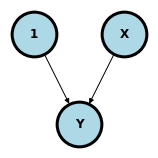

In [6]:
import graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

graph.basic_nn()

To visually understand the structure of a basic neural network, we can use libraries like networkx and matplotlib to create and display graphs. By importing the necessary modules and calling a predefined function graph.basic_nn(), we can generate a simple neural network diagram. This diagram helps to conceptualize how input nodes are connected to an output node. Visualizing these connections makes it easier to grasp the fundamental idea of neural networks and their similarity to regression models

## To interpret this diagram as a neural network, consider the following rule:


* Parent nodes that point to a child node are multiplied by weights then added together then operated on by an activation function to form the child node.*

+ If the parent nodes point to the outcome, then the nodes are combined the operated on by a known function, called the **activation function** to form a prediction. 

To interpret a neural network diagram, consider this rule: parent nodes that point to a child node are multiplied by weights, summed, and then processed by an activation function to form the child node. If the parent nodes point directly to the outcome, these nodes are combined and then operated on by the activation function to generate a prediction. This process is fundamental to neural networks, transforming input features through weighted connections and activation functions to produce an output, illustrating how neural networks extend the concept of regression to more complex, non-linear relationships.

## Continue 
+ So, in this case, this is saying that the intercept (node labeled $1$) times a weight plus BMI (node labeled $X$) times a different weight get combined to form a prediction for SBP $Y$. Or, in other words

$$
\hat Y = g(w_0 \times 1 + w_1 \times X)
$$

+ where $g$ is a function that we specify. So in this case, if $w_0 = 120$, $w_1 = .1$ and $g$ is an idenity function, $g(a) = a$, and a subject had a BMI of 30, then the prediction would be 

$$
\hat Y = g(120 + .1 * 30) = 120.3
$$

In our neural network example, the intercept node (labeled 1) times its weight plus the BMI node (labeled X) times a different weight are combined to form a prediction for SBP (Y). Mathematically, this is expressed as shown above, where g is a specified activation function. 

For instance, if w0=120, w1=0.1, and g is the identity function g(a)=a, and a subject has a BMI of 30, the prediction would be 120.3. This example illustrates how neural networks use weighted inputs and activation functions to make predictions, extending the concept of linear regression to more complex relationships.

## Key Components Missing from the Diagram
+ Note $g$ is not shown in the diagram (though maybe you could with the shape of the child + node) or something like that0. Also not shown in the daigram is:
+ The loss function, i.e. how to measure the different between $\hat Y$ and $Y$.
+ The way the loss function combines subjects; we have multiple BMIs and SBPs
+ How we obtain the weights, $W_0$ and $W_1$; this is done by minmizing the loss function using an algorithm

It's important to note that the activation function g isn't explicitly shown in the neural network diagram, though it could be implied by the shape of the child node. Also not shown in the diagram are several critical components:
The loss function, which measures the difference between the predicted Y-hat and the actual Y.
The method by which the loss function combines multiple subjects' data, since we often have multiple BMIs and SBPs.
The process of obtaining the weights, W0 and W1, which is done by minimizing the loss function using an optimization algorithm.
These elements are crucial for training the neural network, ensuring it learns the optimal weights to make accurate predictions.

### Linear regression as a NN

+ Imagine the case where $g$ is an identity function, our loss function for different subjects is squared error and we combine different losses by adding them up. Then, our weights are obtained by minmizing

$$
\sum_{i=1}^N (Y_i - \hat Y_i)^2 
$$

+ and so, presuming our optimization algorithm works well, it should be idential to linear regression. 

Consider the case where our activation function g is the identity function, our loss function for different subjects is the squared error, and we combine different losses by summing them up. In this scenario, our weights are obtained by minimizing the sum of squared errors, which is the same loss function used in linear regression. Therefore, if our optimization algorithm works well, this neural network model should be identical to linear regression. This example shows how linear regression can be seen as a simple neural network with one layer and an identity activation function.

### Logistic regression as a NN

+ Consider a different setting. Imagine if our $Y$ is 0 or 1 based on whether or not the subject is taking anti-hypertensive mediations. 
+ Further, let $g$ be the sigmoid function, $g(a) = 1 / \{1 + \exp(-a)\}$. 
+ Our prediction is

$$
\hat Y = \{1 + \exp(-W_0 - W_1 X)\}^{-1}
$$

+ which is the logistic regression prediction with intercept $W_0$ and slope $W_1$. Consider a case where

Now, let's consider a different setting where our outcome Y is binary (0 or 1), indicating whether or not a subject is taking anti-hypertensive medications. Suppose our activation function g is the sigmoid function. Our prediction then becomes the logistic regression prediction with intercept W0 and slope W1. By using the sigmoid activation function, we can map the linear combination of inputs into a probability between 0 and 1, aligning with the requirements of logistic regression. This demonstrates how logistic regression can be modeled as a neural network with a sigmoid activation function.

### Example

+ $W_0 = -4$, $W_1 = .1$ and $X=30$, then our $\hat Y = 1 / \{1 + \exp[-(-4 + .1\times 30)\}]\approx .27$. 
+ Thus, this model estimates a 27% probability that a subject with a BMI of 30 has hypertension.

In [2]:
1 / (1 + np.exp(-(-4 + .1 * 30)))

0.2689414213699951

Let's look at an example to illustrate logistic regression as a neural network. Suppose we have W0 equals -4, W1 equals 0.1 and X equals 30. Using the logistic regression prediction formula this model estimates a 27% probability that a subject with a BMI of 30 is taking anti-hypertensive medications. By applying the sigmoid function to the linear combination of inputs, we convert the output into a probability, demonstrating the use of logistic regression within a neural network framework.

## Binary Cross-Entropy and Logistic Regression Maximization
+ Further, if we specify that the loss function is binary cross entropy

$$
- \sum_{i=1}^n \{ Y_i \log(\hat Y_i) + (1 - Y_i) \log(1 - \hat Y_i)\} / N
$$

+ then minmizing our loss function is identical to maximizing the likelihood for logistic regression. 

Furthermore, if we specify that our loss function is binary cross entropy then minimizing this loss function is identical to maximizing the likelihood in logistic regression. This loss function measures the difference between the predicted probabilities and the actual binary outcomes, penalizing incorrect predictions more severely. By minimizing this loss function, we effectively find the optimal weights that maximize the probability of observing the given data, just like in logistic regression

## More layers

+ NNs get better when we add more layers, since then they can discover interactions and non-linearities. 
+ Consider the following model. Notice we quit explicitly adding the bias (intercept) term / node. 

Neural networks become more powerful and effective when we add more layers. These additional layers allow the network to discover complex interactions and non-linear relationships within the data. For example, consider a more advanced model with multiple layers. In this model, we omit the explicit bias (intercept) term or node for simplicity. Each layer transforms the input through weighted connections and activation functions, capturing intricate patterns that a single layer cannot. This hierarchical structure enables neural networks to perform well on complex tasks by learning progressively abstract representations of the data

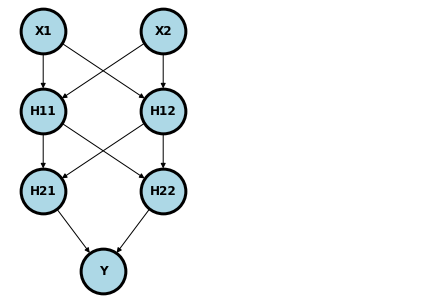

In [7]:
graph.two_layer_nn()

## Neural Network Architecture and Feedforward Calculation
+ Usually, the nodes are added in so called layers. $(X_1, X_2)$ is the input layer, 
+ $(H_{11}, H_{12})$ is the first hidden layer, 
+ $(H_{21}, H_{22})$ is the second hidden layer and $Y$ is the output layer. 
+ Imagine plugging an $X_1$ and $X_2$ into this network. It would feed forward through the network as

$$
\begin{align}
H_{11} = & g_1(W_{011} + W_{111} X_1 + W_{211} X_2) \\
H_{12} = & g_1(W_{012} + W_{112} X_1 + W_{212} X_2) \\
H_{21} = & g_2(W_{021} + W_{121} H_{11} + W_{221} H_{12}) \\
H_{22} = & g_2(W_{022} + W_{122} H_{12} + W_{222} H_{12}) \\
\hat Y = & g_3(W_{031} + W_{131} H_{21} + W_{231} H_{22})
\end{align}
$$

+ where $g_k$ are specified activation functions. 
+ Typically, we would have a different activation function for the output layer than the others, and the other would have the same activation function.

Neural networks typically organize nodes into layers. For example, X1, X2 is the input layer, H_11, H_12 is the first hidden layer, H_2 1, H_2 2 is the second hidden layer, and Y is the output layer. When input values are fed into this network, they propagate through the layers. Here, g_k are specified activation functions. Typically, we use different activation functions for the output layer than for the hidden layers, while the hidden layers generally share the same activation function. This structure allows the network to learn complex patterns by transforming the input through multiple stages.

## Activation functions

+ The output activation function tends to be based on the structure of the outcome. 
+ For example, a binary outcome would likely have a sigmoidal, or other function from $\mathbb{R}$ to $[0, 1]$ so as to model a probability. 
+ The most popular right now is the rectified linear unit (RELU) function. 

$$
RELU(a) = \left\{
\begin{array}{ll}
a & \text{if $a>0$} \\
0 & \text{otherwise}
\end{array}
\right.
= a \times I(a > 0)
$$

Activation functions play a crucial role in neural networks, especially in determining the output. The choice of activation function for the output layer is often based on the nature of the outcome. For example, a binary outcome would typically use a sigmoid function or another function mapping from R to range of 0 and 1 to model probabilities.

One of the most popular activation functions today is the rectified linear unit (RELU) function. This function outputs the input directly if it's positive, and zero otherwise. Its simplicity and effectiveness in avoiding the vanishing gradient problem make it widely used in hidden layers of neural networks. The following slide shows the plot of the RELU function, which is a piecewise linear function that is zero for negative inputs and linear for positive inputs.

## Visualizing RELU function 

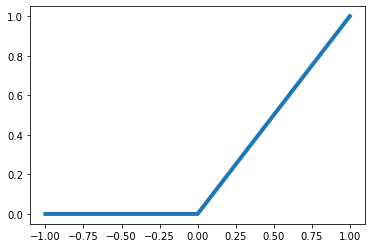

In [8]:
plt.plot( [-1, 0, 1], [0, 0, 1], linewidth = 4);

## Modeling with Shifted ReLUs and Bias Terms
+ If a bias term is included, then the fact that the RELU is centered at zero isn't important, since the intercept term effectively shifts the function around. 
+ These kinds of splin terms are incredibly flexible. Just to show you an example, let's fit the sine function using a collection of shifted RELUs. This is just

$$
Y = \sin(X) + \epsilon
$$

+ being fit with

$$
\sum_{i=1}^N \left\{ Y_i - W_{021} - \sum_{j=1}^{d} W_{j21} g(W_{1j1} X_i- W_{0j1}) \right\}^2
$$

+ where the $W_{kj}$ are the weights for layer $k$. Below, we're just setting $W_{1j1} = 1$ and specifying the $W_{0j1}$ at a sequence of values. 

Even though the RELU function is centered at zero, including a bias term makes this less significant, as the intercept effectively shifts the function. This allows RELUs to be highly flexible. To illustrate, let’s fit the sine function using a collection of shifted RELUs. Here, W_kj are the weights for layer k. In this example, we set W_1j1 = 1 and specify W_0j1 at a sequence of values. This demonstrates the power of using shifted RELUs to fit complex, non-linear functions like the sine wave, showcasing their flexibility in capturing intricate patterns.

## Neural Network Configuration with Specified ReLU Nodes and Identity Outpu
This corresponds to a network like depicted below if there were $d=3$  hidden nodes, there was a relu activation function at the first layer, then a identity activation function for the output layer and the weights for the first layer are specified.

This example corresponds to a neural network with d=3 hidden nodes, a RELU activation function in the first layer, and an identity activation function for the output layer. The weights for the first layer are specified, and the bias terms shift the RELU functions appropriately.

In this setup, the hidden layer with RELU activation captures non-linearities by outputting the input if positive, and zero otherwise. The output layer, using an identity function, sums these contributions directly. This structure allows us to fit complex functions, such as a sine wave, effectively using a combination of shifted RELUs. The diagram below illustrates this network configuration.

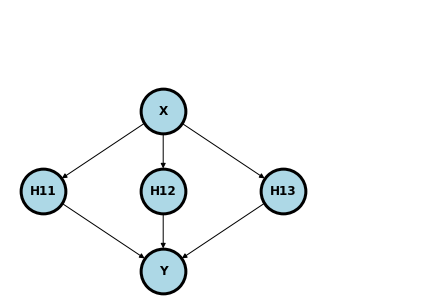

In [9]:
graph.spline_graph()

## Fitting the Function Using Linear Regression
We can actually fit this function with just using linear regression; we show this code below

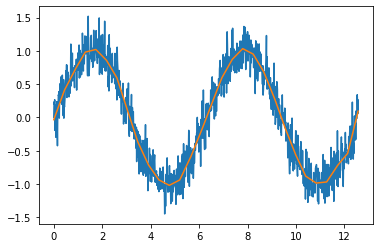

In [6]:
## Generate some data, a sine function on 0,4*pi
n = 1000
x = np.linspace(0, 4 * np.pi, n)
y = np.sin(x) + .2 * np.random.normal(size = n)
## Generate the spline regressors
df = 30
knots = np.linspace(x.min(), x.max(), df)
xmat = np.zeros((n, df))
for i in range(0, df): xmat[:,i] = (x - knots[i]) * (x > knots[i])
## Fit them
from sklearn.linear_model import LinearRegression
yhat = LinearRegression().fit(xmat, y).predict(xmat)
## Plot them versus the data
plt.plot(x, y); plt.plot(x, yhat);

In this example, we generate noisy sine wave data and create spline regressors with specified knots. By fitting a linear regression model to these regressors, we can effectively capture the non-linear sine wave pattern. The plot compares the true data with the fitted values, demonstrating the model's ability to approximate the sine function using linear regression with spline basis functions.

## Optimization

One of the last bits of the puzzle we have to figure out is how to obtain the weights. A good strategy would be to minimize the loss function. However, it's hard to minmize. If we had a derivative, we could try the following. Let $L(W)$ be the loss function for weights $W$. Note, we're omitting the fact that this is a function of the data (predictors and outcome) as well, since that's a set of fixed numbers.

One of the last pieces of the puzzle is figuring out how to obtain the optimal weights for our neural network. A good strategy is to minimize the loss function, where W represents the weights. However, minimizing this loss function can be challenging. If we had the derivative of the loss function, we could use gradient-based methods to find the optimal weights. To optimize the weights, we can use gradient descent, where we iteratively update the weights in the opposite direction of the gradient of the loss function.

### Gradient descent 

+ Consider updating parameters as

$$
W^{(new)} = W^{(old)} - e * L'(W^{(old)})
$$

+ This moves the parameters by a small amount, $e$, called the **learning rate**, in the direction the opposite of the gradient. 
+ Think of a one dimensional convex function. If the derivative at a point is positive, then that point is larger than where the minimum is. Similarily, if the derivative is negative, it's smaller. So, the idea is to head a small amount in the opposite direction of the derivative. 

Gradient descent is an optimization technique for updating the parameters of a neural network. The update rule for the weights is shown above, where W(new) represents the updated weights, W(old) is the current weights, and η is the learning rate, which controls the step size of each update. This rule moves the parameters by a small amount in the direction opposite to the gradient of the loss function.

Imagine a one-dimensional convex function. If the derivative at a point is positive, the current point is larger than the minimum. Conversely, if the derivative is negative, the current point is smaller. Therefore, by moving in the opposite direction of the gradient, we can gradually approach the minimum. This principle is the foundation of gradient descent, guiding the parameters towards the optimal values that minimize the loss function.

## Gradient Computation in a multi-Layer Neural Network
+ How do we get the gradient? Consider the following. 
+ If $X$ is our vector of predictors and $Y$ is our vector of outputs, a neural network with 3 layers, can be thought of as, where $L_k$ is layer $K$ and $W_k$ are the weights for that layer:

$$
L_3(L_2(L_1(X, W_1), W_2) W_3)
$$


To perform gradient descent, we need to compute the gradient of the loss function with respect to the weights. Consider a neural network with 3 layers, where X is our vector of predictors and Y is our vector of outputs. The gradient of the loss function with respect to the weights involves calculating how changes in the weights of each layer affect the output. This requires backpropagation, where we compute the partial derivatives of the loss function starting from the output layer and moving backward through each layer. By doing this, we can determine the necessary adjustments to the weights to minimize the loss function and optimize the network's performance.

### Chain Rule

+ Recall from calculus, if we want the derivative of composed functions we have a really simple rule called the chain rule:

$$
\frac{d}{dx}f(g(x)) = f'(g(x)) g'(x)
$$

+ I.e. if $h=f(u)$ and $u = g(x)$ then $\frac{dh}{dx} = \frac{dh}{du}\frac{du}{dx}$. 

+ If we use the chain rule on our composed loss functions, we wind up bookkeeping backwards through our neural network. That is why it's called **backwards propagation (backprop)**. 

To understand how we obtain the gradient for our neural network, recall the chain rule from calculus. When we want the derivative of composed functions, the chain rule provides a simple solution. Applying the chain rule to our composed loss functions in a neural network involves bookkeeping backwards through the network. This process, known as backpropagation (backprop), calculates the necessary derivatives layer by layer from the output back to the input. This allows us to adjust the weights to minimize the loss function effectively.

### Algorithm schematic

Given, $W^{(new)}$, network, $\phi(X, W)$, which depends on the predictors and the weights 
and loss, $L(Y, \hat Y)$, which depends on the observed and predicted outputs.

0. Set $W^{(old)}=W^{(new)}$
1. Calculate $\hat Y = \phi(X, W^{(old)})$ and loss $L(Y, \hat Y)$.
1. Use back propagation to get to get a numerical approximation to $\frac{d}{dW} L\{Y, \phi(X, W)\} |_{W=W^{(old)}} = L'(W^{(old)})$
3. Update $W^{(new)} = W^{(old)} - e L'(W^{(old)})$
4. Go to step 0.

Let's outline the algorithm for optimizing neural network weights using gradient descent with backpropagation. Given the initial weights W(new), the network which depends on the predictors and weights, and the loss function, which depends on the observed and predicted outputs. The algorithm iteratively updates the weights to minimize the loss function, optimizing the network's performance. 

Initialize: Set the initial weights W(old) to W(new).
Forward Pass: Calculate the predicted output Y-hat and the loss L(Y, Y-hat) using the current weights
Backpropagation: Use backpropagation to compute a numerical approximation of the gradient of the loss function with respect to the weights
Update Weights: Update the weights using the gradient descent update rule 
Repeat: Go back to step 1 with the updated weights and continue the process until convergence or a specified number of iterations